In [1]:
import numpy as np
import scipy.signal as signal
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
R_1 = 150
R_2 = 150000
R_3 = 10000
R_4 = 510
R_L = 2400
C = 0.1e-6

In [28]:
def T_Amp (V_in, I_abc):
    v_t = 25.9 / 1000
#     return I_abc * (np.exp (V_in / v_t) - 1) / (np.exp (V_in / v_t) + 1)
    return (np.exp (V_in / v_t) - 1) / (np.exp (V_in / v_t) + 1)

<IPython.core.display.Javascript object>


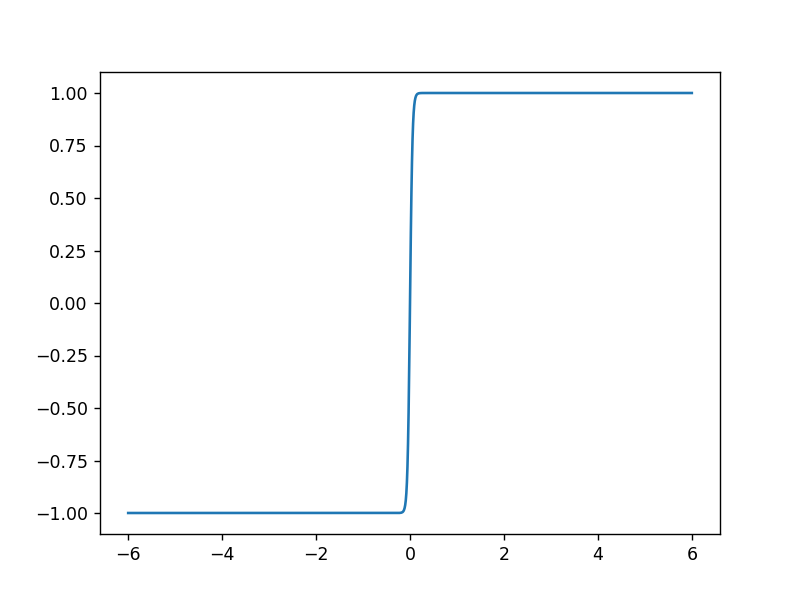

In [31]:
n = np.linspace (-6, 6, 1000)
plt.figure()
plt.plot (n, T_Amp (n, n))

<IPython.core.display.Javascript object>


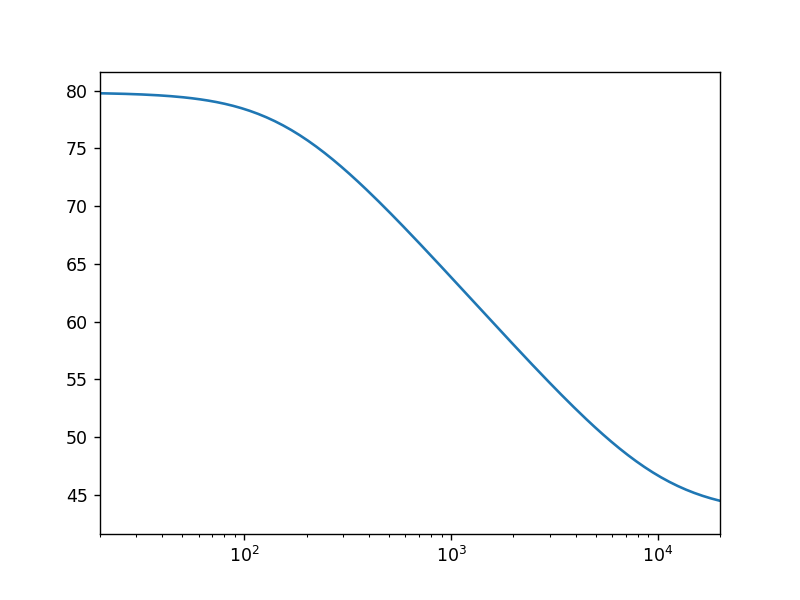

(20, 20000)

In [8]:
a1 = C * (R_1 * (R_2 + R_3 + R_4) + R_2 * (R_3 + R_4))
a0 = (R_2 + R_3 + R_4)

b1 = R_1 * R_2 * (R_3 + R_4) * C
b0 = R_2 * (R_3 + R_4)

w, H = signal.freqs ([b1, b0], [a1, a0])
plt.figure()
plt.semilogx (w / (2 * np.pi), 20 * np.log10 (np.abs (H)))
plt.xlim ((20, 20000))

[256.50045188 -35.66493584]
[ 1.         -0.97751582]


<IPython.core.display.Javascript object>


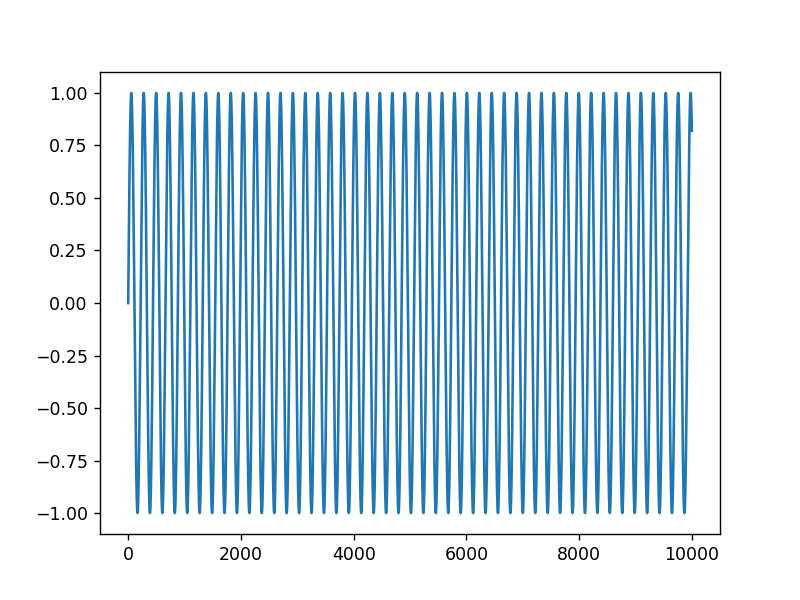

<IPython.core.display.Javascript object>


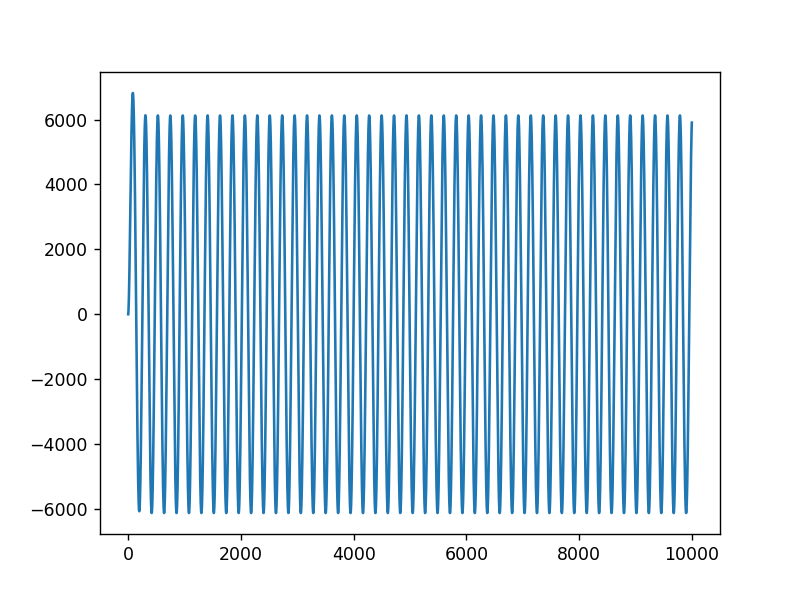

In [14]:
fs = 44100
b_z, a_z = signal.bilinear ([b1, b0], [a1, a0], fs = fs)

print (b_z)
print (a_z)

N = 10000
freq = 200
n = np.arange (N)
x = np.sin (2 * np.pi * n * freq / fs)
plt.figure()
plt.plot (x)

v_a = signal.lfilter (b_z, a_z, x)
plt.figure()
plt.plot (v_a)

C:\Users\jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


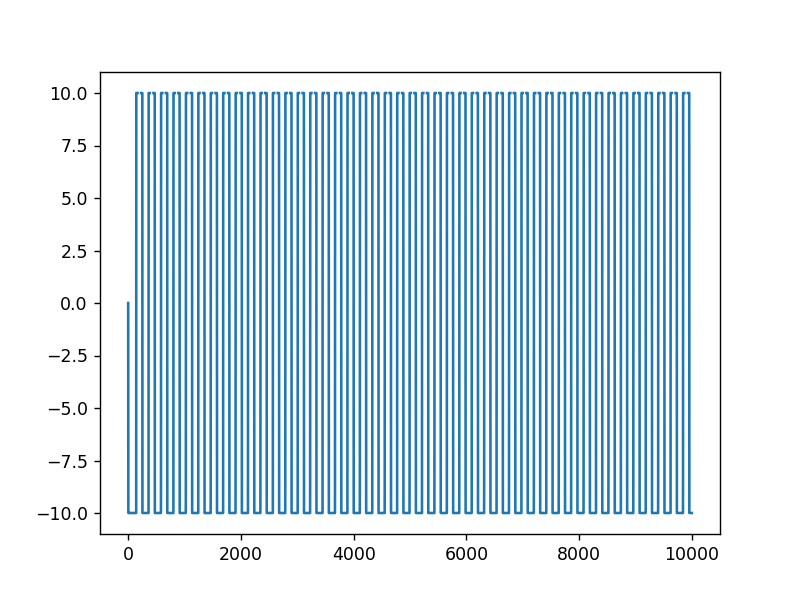

In [33]:
y = np.zeros (N)

for n in range (N):
    V_in = -v_a[n] * R_4 / (R_3 + R_4)
    I_abc = (x[n] * 10e-22)/ (2 * R_1) + v_a[n] / R_2
    
    y[n] = T_Amp (V_in / 10, I_abc) * 10
    
plt.figure()
plt.plot (y)